In [1]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd 
import yfinance as yf
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 11.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [20]:
df = yf.download('BNB-USD', start='2015-01-01', end='2022-12-31', progress=False)
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,2.053140,2.174230,1.893940,1.990770,1.990770,19192200
1,2017-11-10,2.007730,2.069470,1.644780,1.796840,1.796840,11155000
2,2017-11-11,1.786280,1.917750,1.614290,1.670470,1.670470,8178150
3,2017-11-12,1.668890,1.672800,1.462560,1.519690,1.519690,15298700
4,2017-11-13,1.526010,1.735020,1.517600,1.686620,1.686620,12238800
...,...,...,...,...,...,...,...
1873,2022-12-26,243.147934,244.595947,242.224426,244.198288,244.198288,276115280
1874,2022-12-27,244.202652,247.679688,242.562180,246.596680,246.596680,391342277
1875,2022-12-28,246.607117,246.840042,242.109283,244.141922,244.141922,414698978
1876,2022-12-29,244.171417,246.600998,243.579910,246.479721,246.479721,345312528


In [21]:
df = df[['Date','Close']]
df = df.rename(columns={'Date':'ds','Close':'y'})
df.tail(10)

,ds,y
1868,2022-12-21,246.046982
1869,2022-12-22,245.890625
1870,2022-12-23,246.148178
1871,2022-12-24,244.635529
1872,2022-12-25,243.141495
1873,2022-12-26,244.198288
1874,2022-12-27,246.596680
1875,2022-12-28,244.141922
1876,2022-12-29,246.479721
1877,2022-12-30,245.779221


In [22]:
df = df[:-1]
df

,ds,y
0,2017-11-09,1.990770
1,2017-11-10,1.796840
2,2017-11-11,1.670470
3,2017-11-12,1.519690
4,2017-11-13,1.686620
...,...,...
1872,2022-12-25,243.141495
1873,2022-12-26,244.198288
1874,2022-12-27,246.596680
1875,2022-12-28,244.141922


In [23]:
!pip install NeuralProphet
from neuralprophet import NeuralProphet
from matplotlib import pyplot as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
m = NeuralProphet()
m.fit(df, freq='D', epochs=100)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.947% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.947% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: 

Finding best initial lr:   0%|          | 0/232 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,911.524231,1018.439209,0.926150,0.0,0
1,867.022217,973.433899,0.860387,0.0,1
2,798.175842,904.218262,0.760431,0.0,2
3,692.938171,796.531677,0.612005,0.0,3
4,557.343506,651.641418,0.433017,0.0,4
...,...,...,...,...,...
95,38.461037,51.504204,0.004377,0.0,95
96,38.653759,51.650986,0.004380,0.0,96
97,38.530071,51.428391,0.004365,0.0,97
98,38.516815,51.673733,0.004390,0.0,98


In [25]:
future = m.make_future_dataframe(df, periods=120)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.947% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.947% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.167% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.167% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 59it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-12-30,None,247.343781,235.632675,11.449031,0.262075
1,2022-12-31,None,245.441849,235.122879,9.920391,0.398581
2,2023-01-01,None,243.249451,234.612946,8.358947,0.277553
3,2023-01-02,None,240.169769,234.103149,6.770407,-0.703794
4,2023-01-03,None,238.709885,233.593216,5.161032,-0.044362


In [26]:
future.tail()

,ds,y
115,2023-04-24,None
116,2023-04-25,None
117,2023-04-26,None
118,2023-04-27,None
119,2023-04-28,None


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


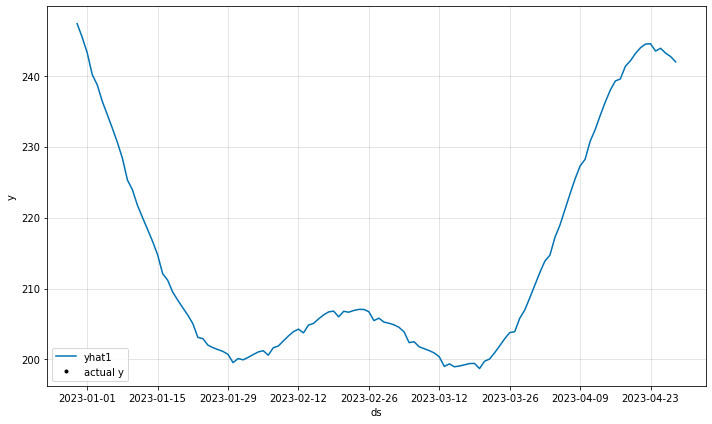

In [27]:
plot1 = m.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


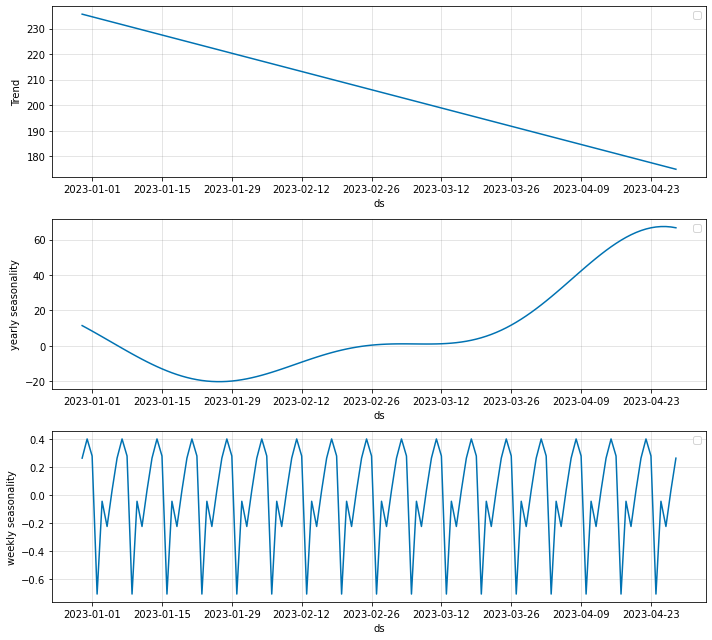

In [28]:
plot2 = m.plot_components(forecast)